In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append("incl/")

import ELPH_utils
import ELPH_Scaler
import ELPH_Optimizer

from ELPH_ELM import SVDELM

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
runs = ELPH_utils.load_runs(filename='../runs_rand_inits.npz')

# runs = runs[::5]
# for k in range(len(runs)):
#     runs[k] = runs[k][:,::2]

n_runs = len(runs)
n_kmax = runs[0].shape[0]

print(n_runs, 'loaded with n_kmax =', n_kmax)

500 loaded with n_kmax = 80


In [18]:
optimizer = ELPH_Optimizer.ridge(alpha=10.**-3.43)

# scaler = ELPH_Scaler.standardize_scaler()
scaler = ELPH_Scaler.normalize_scaler(0.63)
# scaler = ELPH_Scaler.tanh_scaler(arg_scale=1.0, out_scale=0.3)

ELM = SVDELM(runs)
ELM.train(rdim=20, prdim = 30, n_VAR_steps=2, ELM_nodes=500, intercept=True, optimizer=optimizer, scaler=scaler)
ELM.print_status()

rdim:  20
n_VAR_steps:  2
ELM_nodes:  500
ELM_weights_mean:  0.0
ELM_weights_std:  1.0
VAR state shape:  (40, 199500)
ELM state shape:  (501, 199500)
target shape:  (30, 199500)
weights shape:  (501, 30)


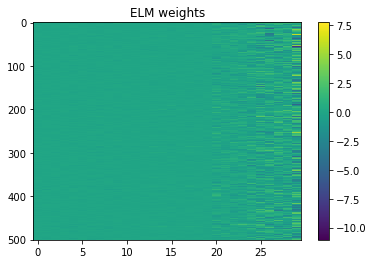

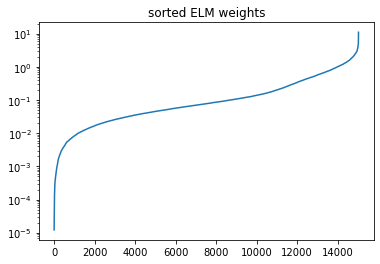

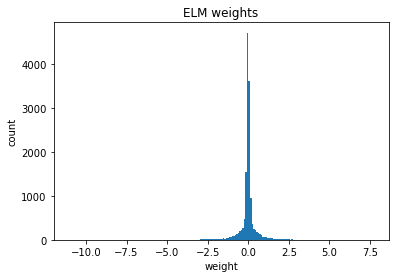

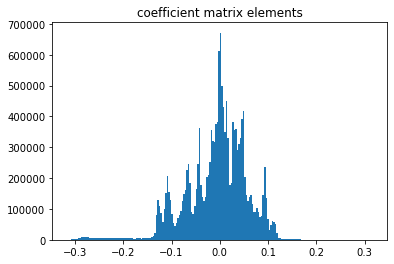

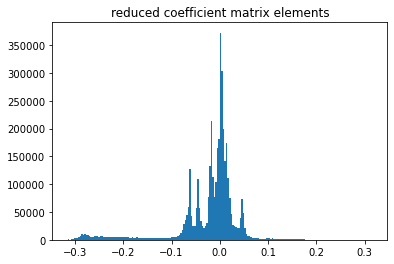

In [20]:
plt.imshow(ELM.w, aspect='auto', interpolation='none')
plt.colorbar()
plt.title('ELM weights')
plt.show()

plt.semilogy(np.sort(np.ravel(np.abs(ELM.w))))
plt.title('sorted ELM weights')
plt.show()

plt.hist(np.ravel(ELM.w), bins=200)
plt.title('ELM weights')
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

plt.hist(np.ravel(ELM.coef_matrix), bins=200)
plt.title('coefficient matrix elements')
plt.show()

plt.hist(np.ravel(ELM.coef_matrix[:ELM.rdim]), bins=200)
plt.title('reduced coefficient matrix elements')
plt.show()

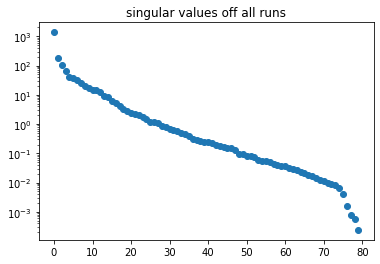

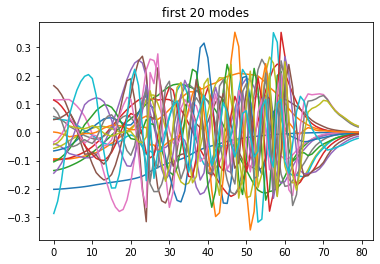

In [21]:
plt.semilogy(ELM.S, 'o')
plt.title('singular values off all runs')
plt.show()
 
for l in range(ELM.rdim):
  plt.plot(ELM.U[:,l],  label='U_'+str(l))
plt.title('first ' + str(ELM.rdim) + ' modes')
plt.show()

In [22]:
optimizer = ELPH_Optimizer.ridge(alpha=10.**-3.43)
scaler = ELPH_Scaler.normalize_scaler(0.63)

train_kwargs = {'rdim':20, 'prdim':30, 'n_VAR_steps':2, 'ELM_nodes':1000, 'intercept':True, 'full_hist':False, 'optimizer':optimizer, 'scaler':scaler}
score_kwargs = {'norm':'max', 'errSVD':False}

m,s = ELPH_utils.get_KFold_CV_scores(ELM, runs, folds=5, seed=817, score_kwargs=score_kwargs, train_kwargs=train_kwargs)
print(m)
print(np.std(s))
print(s)

AttributeError: 'SVDELM' object has no attribute 'NVAR_p'